# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from line_profiler import LineProfiler

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 56 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print("Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

## Задание 1

In [4]:
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

In [7]:
#%%pycodestyle

from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """

    def __init__(self, epsilon=1, min_pts=4):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.epsilon = epsilon
        self.min_pts = min_pts

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.labels = np.empty(x.shape[0])
        self.not_visited = np.full(x.shape[0], True)
        self.x = x
        self.dist = ss.distance.cdist(self.x, self.x, 'euclidean')
        self.neighbours = [np.where(d <= self.epsilon)[0] for d in self.dist]
        C = 0
        for i in range(self.x.shape[0]):
            if not self.not_visited[i]:
                continue
            self.not_visited[i] = False
            nbr = self.neighbours[i]
            if len(nbr) < self.min_pts + 1:
                self.labels[i] = -1
            else:
                self.expand_cluster(i, nbr, C)
                C += 1
        return self

    def expand_cluster(self, i, nbr, C):
        self.labels[i] = C
        for j in nbr:
            if not self.not_visited[j]:
                continue
            self.not_visited[j] = False
            nbr1 = self.neighbours[j]
            if len(nbr1) >= self.min_pts:
                nbr1 = nbr1[self.not_visited[nbr1]]
                self.expand_cluster(j, nbr1, C)
            else:
                self.labels[j] = C

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        labels = np.empty(x.shape[0])
        dist = ss.distance.cdist(self.x, x, 'euclidean')
        for i in range(x.shape[1]):
            nbr = np.arange(self.x.shape[0])[dist[:, i] <= self.epsilon]
            if len(nbr) < self.min_pts:
                lsbels[i] = -1
            arr, counts = np.unique(labels[dist[:, i] <= self.epsilon],
                                    return_counts=True)
            labels[i] = arr[np.argmax(counts)]
        return labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.labels

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

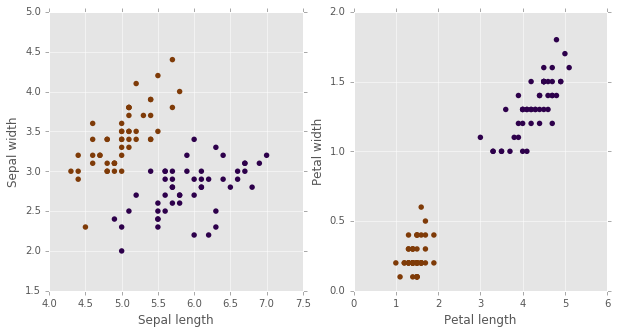

In [8]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [9]:
dbs = Clustering()

pred_iris = dbs.fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [10]:
from sklearn.cluster import DBSCAN

In [19]:
%%time
# sklearn

dbs = DBSCAN(eps=1)
pred_iris = dbs.fit_predict(x_iris)

CPU times: user 4.08 ms, sys: 16 µs, total: 4.1 ms
Wall time: 3.63 ms


In [20]:
%%time
#Clustering

my_dbs = Clustering()
pred_iris = my_dbs.fit_predict(x_iris)

CPU times: user 5.05 ms, sys: 172 µs, total: 5.22 ms
Wall time: 5.28 ms


## Задание 2

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [22]:
#%%pycodestyle
# Silhouette


def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    y[y == -1] = len(np.unique(y)) - 1
    clusters = np.unique(y)
    dist = np.empty((x.shape[0], clusters.size))
    obj_by_clust = {}
    for c in clusters:
        obj_by_clust[c] = x[y == c]
        dist[:, int(c)] = np.mean(ss.distance.cdist(
            x, obj_by_clust[c], 'euclidean'), axis=1)

    sil = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        c = int(y[i])
        a = dist[i, c]
        if len(dist[i, :]) == 1:
            b = 0
        else:
            b = np.min(np.delete(dist[i, :], c))
        sil[i] = (b - a) / np.max([a, b])
    return np.mean(sil)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

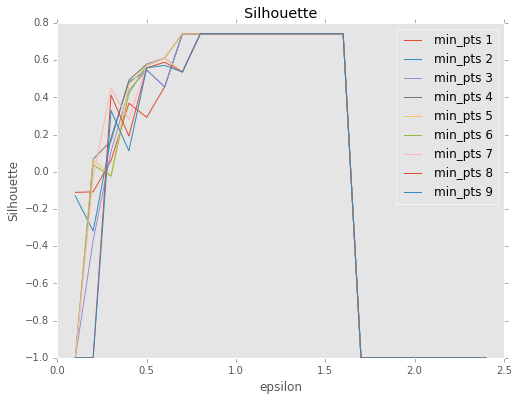

Example of optimal parameters: epsilon = 0.7000000000000001, min_pts = 1


In [23]:
epsilons = np.arange(0.1, 2.5, 0.1)
min_ptss = np.arange(1, 10)
criteria = np.zeros((len(epsilons), len(min_ptss)))

for i, e in enumerate(epsilons):
    for j, m in enumerate(min_ptss):
        cls = Clustering(epsilon=e, min_pts=m)
        y = cls.fit_predict(x_iris)
        criteria[i, j] = quality(x_iris, y)

pl.figure(figsize=(8, 6))
for j, m in enumerate(min_ptss):
    pl.plot(epsilons, criteria[:, j], label='min_pts ' + str(m))
pl.legend()
pl.title("Silhouette")
pl.ylabel("Silhouette")
pl.xlabel("epsilon")
pl.grid()
pl.show()

ind = np.unravel_index(np.argmax(criteria, axis=None), criteria.shape)
epsilon = epsilons[ind[0]]
min_pts = min_ptss[ind[1]]
print('Example of optimal parameters: epsilon = ' + str(epsilon) + ', min_pts = ' + str(min_pts))
cls = Clustering(epsilon=epsilon, min_pts=min_pts)

## Задание 3

In [24]:
df = pd.read_csv('./WDI_csv/WDIData.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [25]:
year = df.count().iloc[4:].idxmax()
year

'2010'

In [26]:
df_ = df.loc[:, ['Country Name', 'Indicator Name', year]]
df_ = df_.pivot(index='Country Name', columns='Indicator Name', values=year)
df_.head()

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,20.68,42.700000,32.400000,82.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.642105
Albania,NaN,NaN,NaN,65.23,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.373536
Algeria,NaN,NaN,NaN,92.41,98.884972,97.594271,99.505684,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.078491
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,100.00,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
np.array(df_.count() >= 262).sum()

5

In [28]:
df_ = df_.iloc[:, np.array(df_.count() >= 262)]
df_.head()

Indicator Name,Land area (sq. km),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,,
Afghanistan,652860.0,44.118443,2.812617,28803167.0,652860.0
Albania,27400.0,106.314635,-0.496462,2913021.0,28750.0
Algeria,2381740.0,15.164391,1.821358,36117637.0,2381740.0
American Samoa,200.0,278.185000,-1.054862,55637.0,200.0
Andorra,470.0,179.678723,-0.015393,84449.0,470.0


In [29]:
df_ = df_.fillna(df_.mean())
df_ = df_.dropna(axis=1, how='all')
df_.head()

Indicator Name,Land area (sq. km),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,,
Afghanistan,652860.0,44.118443,2.812617,28803167.0,652860.0
Albania,27400.0,106.314635,-0.496462,2913021.0,28750.0
Algeria,2381740.0,15.164391,1.821358,36117637.0,2381740.0
American Samoa,200.0,278.185000,-1.054862,55637.0,200.0
Andorra,470.0,179.678723,-0.015393,84449.0,470.0


In [30]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_)
x.shape

(264, 5)

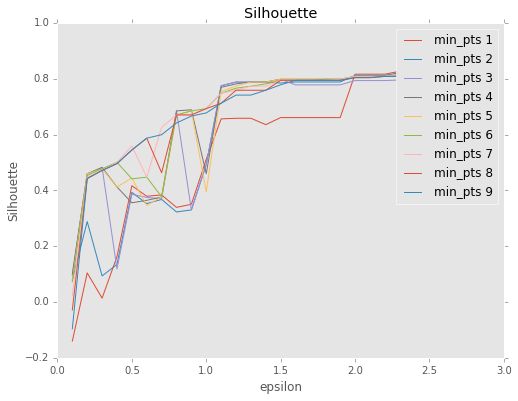

Example of optimal parameters: epsilon = 2.5000000000000004, min_pts = 4


In [31]:
epsilons = np.arange(0.1, 3, 0.1)
min_ptss = np.arange(1, 10)
criteria = np.zeros((len(epsilons), len(min_ptss)))

for i, e in enumerate(epsilons):
    for j, m in enumerate(min_ptss):
        cls = Clustering(epsilon=e, min_pts=m)
        y = cls.fit_predict(x)
        criteria[i, j] = quality(x, y)

pl.figure(figsize=(8, 6))
for j, m in enumerate(min_ptss):
    pl.plot(epsilons, criteria[:, j], label='min_pts ' + str(m))
pl.legend()
pl.title("Silhouette")
pl.ylabel("Silhouette")
pl.xlabel("epsilon")
pl.grid()
pl.show()

ind = np.unravel_index(np.argmax(criteria, axis=None), criteria.shape)
epsilon = epsilons[ind[0]]
min_pts = min_ptss[ind[1]]
print('Example of optimal parameters: epsilon = ' + str(epsilon) + ', min_pts = ' + str(min_pts))
cls = Clustering(epsilon=epsilon, min_pts=min_pts)
y = cls.fit_predict(x)

In [32]:
cls = Clustering(epsilon=0.11, min_pts=3)
y = cls.fit_predict(x)

In [33]:
np.unique(y, return_counts=True)

(array([-1.,  0.,  1.,  2.]), array([105,  26,  95,  38]))

In [34]:
countries = list(df_.index)
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD coun

In [35]:
from sklearn.manifold import TSNE

In [36]:
x_tsne = TSNE(n_components=2).fit_transform(x)

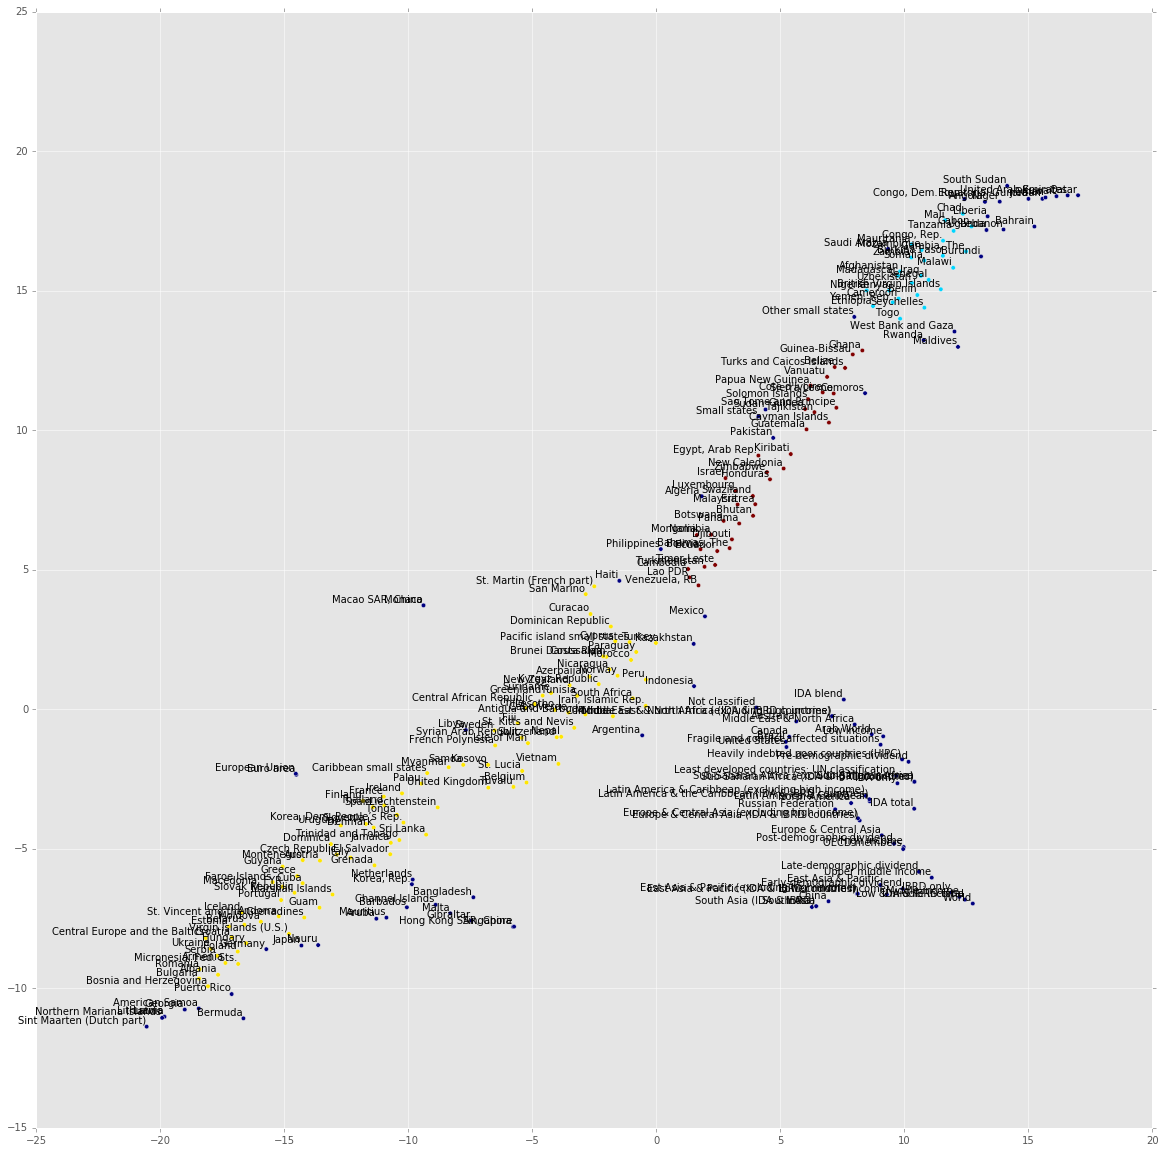

In [39]:
pl.figure(figsize=(20, 20))
pl.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
for label, i, j in zip(countries, x_tsne[:, 0], x_tsne[:, 1]):
    pl.annotate(
        label,
        xy=(i, j), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
      #  arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

pl.show()

In [40]:
df_.head()

Indicator Name,Land area (sq. km),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,,
Afghanistan,652860.0,44.118443,2.812617,28803167.0,652860.0
Albania,27400.0,106.314635,-0.496462,2913021.0,28750.0
Algeria,2381740.0,15.164391,1.821358,36117637.0,2381740.0
American Samoa,200.0,278.185000,-1.054862,55637.0,200.0
Andorra,470.0,179.678723,-0.015393,84449.0,470.0


In [41]:
np.array(countries)[y == 0]

array(['Afghanistan', 'Benin', 'British Virgin Islands', 'Burkina Faso',
       'Cameroon', 'Chad', 'Congo, Rep.', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Iraq', 'Kenya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Nigeria', 'Senegal', 'Seychelles',
       'Somalia', 'Tanzania', 'Togo', 'Uzbekistan', 'Yemen, Rep.',
       'Zambia'], dtype='<U52')

In [42]:
np.array(countries)[y == 1]

array(['Albania', 'Andorra', 'Antigua and Barbuda', 'Armenia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
       'Brunei Darussalam', 'Bulgaria', 'Cabo Verde',
       'Caribbean small states', 'Central African Republic',
       'Central Europe and the Baltics', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Greece', 'Greenland', 'Grenada',
       'Guam', 'Guyana', 'Hungary', 'Iceland', 'Iran, Islamic Rep.',
       'Ireland', 'Isle of Man', 'Italy', 'Jamaica',
       'Korea, Dem. People’s Rep.', 'Kosovo', 'Kyrgyz Republic',
       'Lesotho', 'Liechtenstein', 'Macedonia, FYR', 'Marshall Islands',
       'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'New Zealand', 'Nicaragua', 'Norway',
       'Pacific 

In [43]:
np.array(countries)[y == 2]

array(['Bahamas, The', 'Belize', 'Bhutan', 'Bolivia', 'Botswana',
       'Cambodia', 'Cayman Islands', "Cote d'Ivoire", 'Djibouti',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Honduras', 'Israel', 'Kiribati',
       'Lao PDR', 'Luxembourg', 'Malaysia', 'Mongolia', 'Namibia',
       'New Caledonia', 'Panama', 'Papua New Guinea',
       'Sao Tome and Principe', 'Sierra Leone', 'Solomon Islands',
       'Swaziland', 'Tajikistan', 'Timor-Leste', 'Turkmenistan',
       'Turks and Caicos Islands', 'Vanuatu', 'Venezuela, RB', 'Zimbabwe'],
      dtype='<U52')

In [44]:
np.array(countries)[y == -1]

array(['Algeria', 'American Samoa', 'Angola', 'Arab World', 'Argentina',
       'Aruba', 'Australia', 'Bahrain', 'Bangladesh', 'Barbados',
       'Bermuda', 'Brazil', 'Burundi', 'Canada', 'Channel Islands',
       'China', 'Comoros', 'Congo, Dem. Rep.',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Equatorial Guinea',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Fragile and conflict affected situations', 'Georgia', 'Germany',
       'Gibraltar', 'Haiti', 'Heavily indebted poor countries (HIPC)',
       'High income', 'Hong Kong SAR, China', 'IBRD only',
       'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'India',
       'Indonesia', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Rep.',
       'Kuwait', 'Late-demographic divi

## Задание 4

При попытке учитывать все признаки с заполнением пропусков средними значениями получалась ерунда: образовывался один большой костер и немножко выбросов либо много выбросов и несколько маленьких кластеров. Поэтому была предпринята попытка отбросить самые незаполненные признаки. Однако, ситуация оставалось такой же, пока их не стало 5. Здесь хоть немного видно кластеры приличного размера. 

Используемые в итоге признаки: Land area (sq. km); 	Population density (people per sq. km of land area); 	Population growth (annual %); 	Population, total; 	Surface area (sq. km).


##### 1
'Afghanistan', 'Benin', 'British Virgin Islands', 'Burkina Faso',
       'Cameroon', 'Chad', 'Congo, Rep.', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Iraq', 'Kenya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Nigeria', 'Senegal', 'Seychelles',
       'Somalia', 'Tanzania', 'Togo', 'Uzbekistan', 'Yemen, Rep.',
       'Zambia'
       
В основном здесь Африка и некоторые страны Евразии, близкие к Африке.

##### 2
'Albania', 'Andorra', 'Antigua and Barbuda', 'Armenia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
       'Brunei Darussalam', 'Bulgaria', 'Cabo Verde',
       'Caribbean small states', 'Central African Republic',
       'Central Europe and the Baltics', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Greece', 'Greenland', 'Grenada',
       'Guam', 'Guyana', 'Hungary', 'Iceland', 'Iran, Islamic Rep.',
       'Ireland', 'Isle of Man', 'Italy', 'Jamaica',
       'Korea, Dem. People’s Rep.', 'Kosovo', 'Kyrgyz Republic',
       'Lesotho', 'Liechtenstein', 'Macedonia, FYR', 'Marshall Islands',
       'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'New Zealand', 'Nicaragua', 'Norway',
       'Pacific island small states', 'Palau', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Romania', 'Samoa', 'San Marino', 'Serbia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain',
       'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'St. Vincent and the Grenadines',
       'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic',
       'Thailand', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Tuvalu', 'Ukraine', 'United Kingdom', 'Uruguay', 'Vietnam',
       'Virgin Islands (U.S.)'
       
Существенная часть Европы и Южной Америки, а также некоторые страны Африки и некоторые острова.

##### 3
'Bahamas, The', 'Belize', 'Bhutan', 'Bolivia', 'Botswana',
       'Cambodia', 'Cayman Islands', "Cote d'Ivoire", 'Djibouti',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Honduras', 'Israel', 'Kiribati',
       'Lao PDR', 'Luxembourg', 'Malaysia', 'Mongolia', 'Namibia',
       'New Caledonia', 'Panama', 'Papua New Guinea',
       'Sao Tome and Principe', 'Sierra Leone', 'Solomon Islands',
       'Swaziland', 'Tajikistan', 'Timor-Leste', 'Turkmenistan',
       'Turks and Caicos Islands', 'Vanuatu', 'Venezuela, RB', 'Zimbabwe'
       
Оставшиеся страны Африки и Южной Америки

Остальные страны определились как выбросы. Кластеризация проводилась, в основном, по пощади и населению.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.